In [1]:
# Bibliotecas
import numpy as np
import pandas as pd

# Libs para utilizar o Plotly
import plotly.express as px
import plotly.graph_objects as Dash

In [2]:
# Lendo a base de dados
Base_Dados = pd.read_excel('Dados_Bitcoin.xlsx')

# Verificando
Base_Dados.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-03-24,1040.469971,934.357971,1038.449951,937.520020,491038016,937.520020
1,2017-03-25,975.760986,903.713013,936.539978,972.778992,435803008,972.778992
2,2017-03-26,1007.960022,954.185974,974.015015,966.724976,303668000,966.724976
3,2017-03-27,1046.400024,971.984009,972.054993,1045.770020,372535008,1045.770020
4,2017-03-28,1064.650024,1027.729980,1044.579956,1047.150024,326332000,1047.150024
5,2017-03-29,1055.130005,1015.880005,1046.079956,1039.969971,298457984,1039.969971
6,2017-03-30,1049.290039,1020.039978,1042.209961,1026.430054,352968992,1026.430054
7,2017-03-31,1074.920044,1026.640015,1026.640015,1071.790039,447287008,1071.790039
8,2017-04-01,1091.719971,1061.089966,1071.709961,1080.500000,289633984,1080.500000
9,2017-04-02,1107.589966,1075.449951,1080.609985,1102.170044,514187008,1102.170044


In [3]:
Base_Dados.set_index('Date',inplace=True)

In [4]:
fig=px.line(Base_Dados,y='Close')
fig.show()

In [5]:
Media_Movel=Base_Dados['Close'].rolling(5).mean()
media_Tendencia=Base_Dados['Close'].rolling(30).mean()

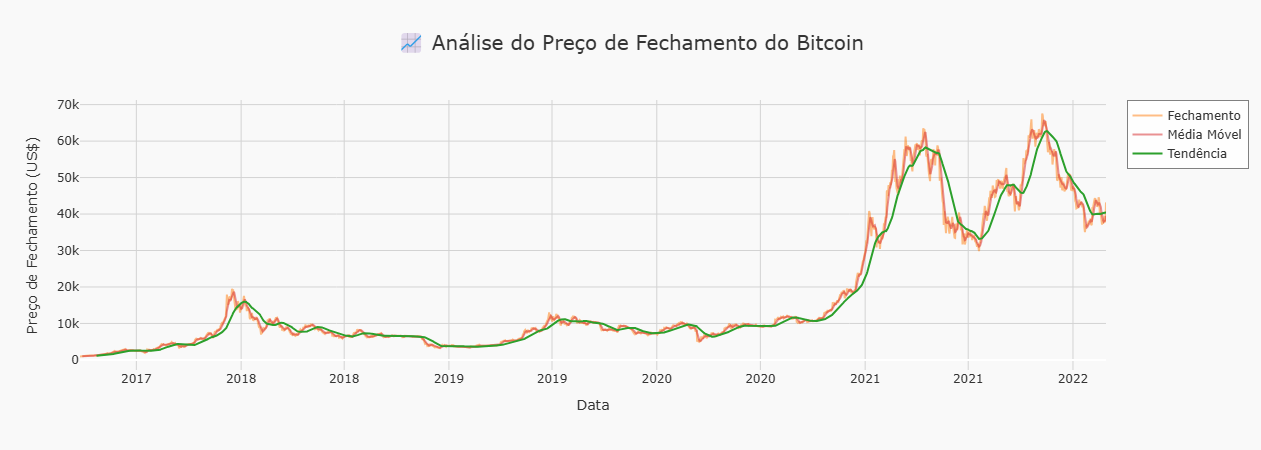

In [23]:
import plotly.graph_objects as go
from IPython.display import Image

# Figura principal
Figura = go.Figure()

# Linha do fechamento
Figura.add_trace(go.Scatter(
    x=Base_Dados.index,
    y=Base_Dados.Close,
    mode='lines',
    name='Fechamento',
    marker_color='#ff7f0e',
    opacity=0.5
))

# Média móvel
Figura.add_trace(go.Scatter(
    x=Base_Dados.index,
    y=Media_Movel,
    mode='lines',
    name='Média Móvel',
    marker_color='#d62728',
    opacity=0.5
))

# Tendência
Figura.add_trace(go.Scatter(
    x=Base_Dados.index,
    y=media_Tendencia,
    mode='lines',
    name='Tendência',
    marker_color='#2ca02c'
))

# Layout ajustado
Figura.update_layout(
    title=dict(
        text='📈 Análise do Preço de Fechamento do Bitcoin',
        font=dict(size=20),
        x=0.5
    ),
    xaxis=dict(
        title='Data',
        tickformat='%Y',  # Mostra só o ano. Pode usar '%b %Y' pra mês + ano
        tickangle=0,
        showgrid=True,
        gridcolor='lightgray',
        type='date'  # Força eixo como datas
    ),
    yaxis=dict(
        title='Preço de Fechamento (US$)',
        showgrid=True,
        gridcolor='lightgray'
    ),
    legend=dict(
        bgcolor='rgba(255,255,255,0.9)',
        bordercolor='gray',
        borderwidth=1
    ),
    plot_bgcolor='#f9f9f9',
    paper_bgcolor='#f9f9f9',
    font=dict(color='#333')
)


Figura.show()

# Mostrar imagem gerada se tiver visualizando pelo nbviewer
Image("newplot.png")

